<a href="https://colab.research.google.com/github/ksc3045/NLP-Assignments/blob/main/nlp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization using re module

In [13]:
# The following code is written to display the overflowing output in wrapped
# out manner. All long-line outputs will be wrapped to the next line and we
# won't need to scroll left-right to see the output.

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## importing regular expression module

In [9]:
import re


In [4]:
import requests
from bs4 import BeautifulSoup

###html_text taken from **Gutenberg** website of a book named **From the heart of a friend**

### html_text taken from gutenberg website using beautiful soup

In [5]:
def get_html_text(url):
  response = requests.get(url)
  response.encoding = "utf-8"
  html_content=response.text
  print(response.text[:10000])
  return html_content


In [6]:
url="https://www.gutenberg.org/cache/epub/75263/pg75263-images.html"

In [7]:
text=get_html_text(url)


<!DOCTYPE html>
<html lang="en"><head>
    <meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight:bold;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-t

## Extract content inside <body> to remove extra metadata

### Before the **body tag** in the HTML structure , there is important metadata and some CSS (styling) that define how the eBook's page will appear and behave.

* by observing the html ebook page we can see that  all the text is stored in betweeen body tags in html page.
* so we only consider the part after body tag and match pattern of opening body tag and ending body tag

# Matching Body Tags

In [11]:
body_pattern = r'<body.*?>(.*?)</body>'  # Non-greedy match for safety
body_match = re.search(body_pattern, text, re.DOTALL)

In [15]:
# Check if a match was found before proceeding
if body_match:
    body_content = body_match.group(1).strip()  # Extract and strip extra spaces

    # Remove all HTML tags
    clean_text = re.sub(r'<[^>]+>', ' ', body_content)


    # Remove excessive whitespace
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    # Tokenize (split words, numbers, and punctuation separately)
    tokens = re.findall(r"\w+|[^\w\s]", clean_text)

    print(tokens[:200])
else:
    print("Error: Could not extract content from <body> tag.")


['The', 'Project', 'Gutenberg', 'eBook', 'of', 'From', 'the', 'heart', 'of', 'a', 'friend', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're', '-', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', '.', 'gutenberg', '.', 'org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', '.', 'Title', ':', 'From', 'the', 'heart', 'of', 'a', 'friend', 'Compiler', ':', 'Amy', 'Addingley', 'Release', 'date', ':', 'January', '31', ',', '2025', '[', 'eBook', '#', '75263

# number of tokens

In [19]:
len(tokens)

18497

# removing stop words.

### Define a string of punctuation characters

* remove the punctuation marks as they are of no use in understanding context.
* think of all punctuation marks and make a list of them.
* after that match them in text and remove them from text.

In [20]:
punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''



### Convert the string into a list of individual punctuation marks

In [21]:
punctuation_list = list(punctuation)

In [22]:
print(punctuation_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [100]:
cleaned_tokens = [token for token in tokens if token not in punctuation_list]
print(cleaned_tokens[:100])


['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'United', 'States', 'parts', 'world', 'cost', 'restrictions', 'whatsoever', 'copy', 'away', 'use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', 'eBook', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', 'Credits', 'Peter', 'Becker', 'Online', 'Distributed', 'Proofreading', 'Team', 'file', 'produced', 'images', 'generously', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'PECK', 'CO', 'Copyright', 'PLATT', 'amp', 'PECK', 'COMPANY', 'PREFACE', 'FRIEND', 'quickens', 'pulse', 'warms', 'heart', 'beautiful', 'relationship', 'human', 'intercourse', 'friend

In [25]:
len(cleaned_tokens)

15845

* almost 3000 tokens have been reduced after removing the punctuation marks.

In [102]:
stop_words = ['a', 'an', 'the', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'will', 'would', 'should', 'can', 'could', 'may', 'might', 'must', 'in', 'on', 'at', 'to', 'from', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'under', 'over', 'of', 'i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'as', 'if', 'than', 'then', 'so', 'because', 'while', 'not', 'no', 'nor', 'only', 'own', 'same', 'such', 'very', 'too', 'more', 'most', 'less', 'least', 'just', 'enough', 'other', 'some', 'any', 'all', 'both', 'each', 'few', 'many', 'several', 'every', 'either', 'neither', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
filtered_tokens = [token for token in cleaned_tokens if token.lower() not in stop_words]

print(filtered_tokens[:100])

['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'United', 'States', 'parts', 'world', 'cost', 'restrictions', 'whatsoever', 'copy', 'away', 'use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', 'eBook', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', 'Credits', 'Peter', 'Becker', 'Online', 'Distributed', 'Proofreading', 'Team', 'file', 'produced', 'images', 'generously', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'PECK', 'CO', 'Copyright', 'PLATT', 'amp', 'PECK', 'COMPANY', 'PREFACE', 'FRIEND', 'quickens', 'pulse', 'warms', 'heart', 'beautiful', 'relationship', 'human', 'intercourse', 'friend

In [27]:
len(filtered_tokens)

8651

*  initially there were 18497 tokens after removing punctuations and stopwords it has gotten reduced to half of it.

* now we have a list of tokens tokenized by re.

# Tokenization using nltk

In [35]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
nltk_tokens = word_tokenize(clean_text)
print(nltk_tokens[:200])


['The', 'Project', 'Gutenberg', 'eBook', 'of', 'From', 'the', 'heart', 'of', 'a', 'friend', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', '.', 'Title', ':', 'From', 'the', 'heart', 'of', 'a', 'friend', 'Compiler', ':', 'Amy', 'Addingley', 'Release', 'date', ':', 'January', '31', ',', '2025', '[', 'eBook', '#', '75263', ']', 'Language', ':',

## Remove punctuation

In [37]:
punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
punctuation_list = list(punctuation)
cleaned_tokens = [token for token in nltk_tokens if token not in punctuation_list]

In [39]:
from nltk.corpus import stopwords

In [40]:
stop_words = set(stopwords.words('english'))  # Use a set for faster lookups
filtered_nltk_tokens = [token for token in cleaned_tokens if token.lower() not in stop_words]

In [108]:
print(filtered_nltk_tokens[:100])


['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'www.gutenberg.org', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'using', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', '31', '2025', 'eBook', '75263', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', '1910', 'Credits', 'Peter', 'Becker', 'Online', 'Distributed', 'Proofreading', 'Team', 'https', '//www.pgdp.net', 'file', 'produced', 'images', 'generously', 'made', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'PECK', 'CO', 'Copyright', '1910', '

In [148]:
len(filtered_nltk_tokens)

8079

In [111]:
def check_punctuation_in_words(tokens):
    pattern = r"^[^\w\s]|[^a-zA-Z0-9\s]$"

    words_with_punctuation = []
    for token in tokens:
        if re.search(pattern, token):
          words_with_punctuation.append(token)
    return words_with_punctuation

words_with_punctuation = check_punctuation_in_words(filtered_nltk_tokens)
print(words_with_punctuation[:100])


['//www.pgdp.net', '’', '’', '—Quarles', '—Landor', '’', '—Lytton', '—Seneca', '—Emerson', '—Napoleon', '—Jonson', '—Channing', '’', '—Byron', '—Farrar', '—Taylor', '—Alger', '’', '—Unknown', '—Washington', '—Lytton', '’', '—Mulock', '—Gold', '’', '’', '—Byron', '’', '’', '’', '—Holmes', '—Williams', '—Unknown', '—Richter', '’', '’', '—Adams', '—Taylor', '—Thoreau', '—Franklin', '—Lucanus', '—Seneca', '’', '—Philips', '—Stowe', '’', '’', '’', '—Anon', '—Unknown', '—Schiller', '’', '—Holmes', '—Sidney', '—Shakespeare', '’', '’', '’', '—Jonson', '—Bacon', '—Coleridge', '—Jonson', '—St', '—Montaigne', '—Taylor', '—Cicero', '—Addison', '’', '—Morris', '’', '’', '—Unknown', '—Watts', '—Shakespeare', '—Lavater', '’', '—Aeschylus', '—From', '—Cowper', '’', '—Browning', '—Keats', '—Emerson', '—Tennyson', '—Byron', '—Jonson', '—Hunt', '—Browne', '—Thoreau', '—Ouida', '—Lamb', '’', '—Cicero', '’', '—Brooks', '—Cicero', '—Arnold', '—Kingsley', '’', '—Scott']


In [112]:
len(words_with_punctuation)

562

* i removed punctuations but i was unable to remove all of them.there are 569 words with punctuations attached with words.

## stemming using nltk

In [113]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens = [porter.stem(token) for token in filtered_nltk_tokens]
print(stemmed_tokens[:50])


['project', 'gutenberg', 'ebook', 'heart', 'friend', 'ebook', 'use', 'anyon', 'anywher', 'unit', 'state', 'part', 'world', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 're-us', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www.gutenberg.org', 'locat', 'unit', 'state', 'check', 'law', 'countri', 'locat', 'use', 'ebook', 'titl', 'heart', 'friend', 'compil', 'ami', 'addingley', 'releas', 'date', 'januari', '31', '2025']


## lemmatization using nltk

In [114]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [115]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_nltk_tokens]
print(lemmatized_tokens[:100])

['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use', 'term', 'Project', 'Gutenberg', 'License', 'included', 'ebook', 'online', 'www.gutenberg.org', 'located', 'United', 'States', 'check', 'law', 'country', 'located', 'using', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', '31', '2025', 'eBook', '75263', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', '1910', 'Credits', 'Peter', 'Becker', 'Online', 'Distributed', 'Proofreading', 'Team', 'http', '//www.pgdp.net', 'file', 'produced', 'image', 'generously', 'made', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'PECK', 'CO', 'Copyright', '1910', 'PLATT'

# Tokenization using spacy

In [54]:
import spacy

In [55]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(clean_text)
doc[:50]

The Project Gutenberg eBook of From the heart of a friend This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or

In [59]:
tokens_spacy = [token.text for token in doc if token.is_alpha and not token.is_stop]

In [60]:
tokens_spacy[:30]

['Project',
 'Gutenberg',
 'eBook',
 'heart',
 'friend',
 'ebook',
 'use',
 'United',
 'States',
 'parts',
 'world',
 'cost',
 'restrictions',
 'whatsoever',
 'copy',
 'away',
 'use',
 'terms',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'ebook',
 'online',
 'located',
 'United',
 'States',
 'check',
 'laws',
 'country']

In [116]:
words_with_punctuation_spacy = check_punctuation_in_words(tokens_spacy)
words_with_punctuation_spacy[:50]

[]

In [117]:
len(words_with_punctuation_spacy)

0

## stemimng using spacy

In [118]:
stemmed_tokens_spacy = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
print(stemmed_tokens_spacy[:100])


['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'United', 'States', 'part', 'world', 'cost', 'restriction', 'whatsoever', 'copy', 'away', 'use', 'term', 'Project', 'Gutenberg', 'License', 'include', 'ebook', 'online', 'locate', 'United', 'States', 'check', 'law', 'country', 'locate', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', 'eBook', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', 'Credits', 'Peter', 'Becker', 'Online', 'distribute', 'Proofreading', 'Team', 'file', 'produce', 'image', 'generously', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'peck', 'CO', 'Copyright', 'PLATT', 'amp', 'peck', 'COMPANY', 'PREFACE', 'FRIEND', 'quicken', 'pulse', 'warm', 'heart', 'beautiful', 'relationship', 'human', 'intercourse', 'friendship', 'easi

## lemmatization using spacy

In [119]:
text = " ".join(tokens_spacy)
doc = nlp(text)
lemmatized_tokens = [token.lemma_ for token in doc]
print(lemmatized_tokens[:100])


['Project', 'Gutenberg', 'eBook', 'heart', 'friend', 'ebook', 'use', 'United', 'States', 'part', 'world', 'cost', 'restriction', 'whatsoever', 'copy', 'away', 'use', 'term', 'Project', 'Gutenberg', 'License', 'include', 'ebook', 'online', 'locate', 'United', 'States', 'check', 'law', 'country', 'locate', 'eBook', 'Title', 'heart', 'friend', 'Compiler', 'Amy', 'Addingley', 'Release', 'date', 'January', 'eBook', 'Language', 'English', 'Original', 'publication', 'New', 'York', 'Platt', 'amp', 'Peck', 'Co', 'Credits', 'Peter', 'Becker', 'Online', 'distribute', 'Proofreading', 'Team', 'file', 'produce', 'image', 'generously', 'available', 'Internet', 'Archive', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HEART', 'FRIEND', 'Heart', 'Friend', 'Selected', 'AMY', 'ADDINGLEY', 'New', 'York', 'PLATT', 'amp', 'peck', 'CO', 'Copyright', 'PLATT', 'amp', 'peck', 'COMPANY', 'PREFACE', 'FRIEND', 'quicken', 'pulse', 'warm', 'heart', 'beautiful', 'relationship', 'human', 'intercourse', 'friendship', 'easi

## tokenization using keras

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [68]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts([clean_text])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences([clean_text])[0]
print("First 20 tokens (as integers):", sequences[:20])
print("\nWord index (first 10 words):", list(word_index.items())[:10])

First 20 tokens (as integers): [2, 28, 66, 151, 3, 33, 2, 58, 3, 6, 9, 30, 151, 7, 16, 2, 107, 3, 349, 776]

Word index (first 10 words): [('<OOV>', 1), ('the', 2), ('of', 3), ('and', 4), ('to', 5), ('a', 6), ('is', 7), ('in', 8), ('friend', 9), ('with', 10)]


In [134]:
words_list = list(tokenizer.word_index.keys())

In [136]:
len(words_list)

3237

## remove stopwords

In [139]:
words_list = [word for word in words_list if word.lower() not in stop_words]

In [140]:
len(words_list)

3121

## keras handles puntuations by default

In [141]:
print(words_list[:50])

['<OOV>', 'friend', 'friendship', 'love', 'friends', 'project', 'gutenberg™', 'there', '1', 'work', 'when', 'heart', 'thy', 'man', 'old', 'like', 'gutenberg', 'true', 'works', 'good', 'never', 'thee', 'life', 'electronic', 'make', 'where', 'shall', 'without', 'e', 'world', 'terms', 'sweet', 'thou', 'copyright', 'foundation', 'new', 'best', 'whose', 'how', 'use', 'states', 'say', '—shakespeare', 'agreement', 'license', 'come', 'full', 'time', 'out', 'united']


In [142]:
words_with_punctuation_keras=check_punctuation_in_words(words_list)
print(words_with_punctuation_keras[:50])

['<OOV>', 'gutenberg™', '—shakespeare', '—unknown', '”', '—emerson', '—tennyson', '—jonson', '—thoreau', '’tis', '—longfellow', '—lytton', '—seneca', '—cicero', '“project', 'gutenberg”', '—byron', '—taylor', '—holmes', '—arnold', '—eliot', '—a', '—', 'together—', '•', '—philips', '—schiller', '—coleridge', '—ouida', '—landor', '—alger', '—anon', '—st', '—montaigne', '—lavater', '—brooks', '—macdonald', '—stevenson', 'blue—', '—smith', '—hale', '—lowell', '—wycherley', '“we', '—robertson', '—holland', '—drummond', 'it—', '—meredith', '—pollok']


In [143]:
len(words_with_punctuation_keras)

202

## keras tokenizer has succesfully reduced words with punctuation better than spacy,nltk.

## stemmming after tokenization using keras

In [144]:
porter = PorterStemmer()
stemmed_tokens = [porter.stem(token) for token in words_list]
print(stemmed_tokens[:50])

['<oov>', 'friend', 'friendship', 'love', 'friend', 'project', 'gutenberg™', 'there', '1', 'work', 'when', 'heart', 'thi', 'man', 'old', 'like', 'gutenberg', 'true', 'work', 'good', 'never', 'thee', 'life', 'electron', 'make', 'where', 'shall', 'without', 'e', 'world', 'term', 'sweet', 'thou', 'copyright', 'foundat', 'new', 'best', 'whose', 'how', 'use', 'state', 'say', '—shakespear', 'agreement', 'licens', 'come', 'full', 'time', 'out', 'unit']


## lemmatization

In [145]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in words_list]
print(lemmatized_tokens[:100])

['<OOV>', 'friend', 'friendship', 'love', 'friend', 'project', 'gutenberg™', 'there', '1', 'work', 'when', 'heart', 'thy', 'man', 'old', 'like', 'gutenberg', 'true', 'work', 'good', 'never', 'thee', 'life', 'electronic', 'make', 'where', 'shall', 'without', 'e', 'world', 'term', 'sweet', 'thou', 'copyright', 'foundation', 'new', 'best', 'whose', 'how', 'use', 'state', 'say', '—shakespeare', 'agreement', 'license', 'come', 'full', 'time', 'out', 'united', 'cannot', '—unknown', 'still', 'people', 'friendship', 'give', 'found', 'soul', 'yet', 'word', 'sun', 'donation', 'away', 'archive', 'faithful', 'word', 'though', 'thing', 'day', 'let', 'loved', 'trademark', 'ebook', 'much', 'upon', 'ever', 'o', 'nothing', 'set', 'part', '”', 'literary', 'copy', 'year', 'hour', 'long', '—emerson', 'thing', 'know', 'men', 'here', 'place', 'alone', 'law', 'think', '3', 'always', 'form', 'ye', 'affection']


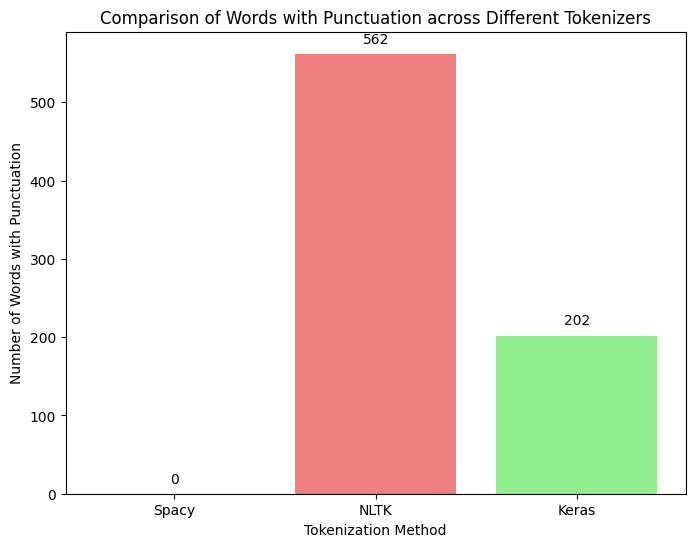

In [146]:
import matplotlib.pyplot as plt

categories = ['Spacy', 'NLTK', 'Keras']
values = [len(words_with_punctuation_spacy), len(words_with_punctuation), len(words_with_punctuation_keras)]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Tokenization Method")
plt.ylabel("Number of Words with Punctuation")
plt.title("Comparison of Words with Punctuation across Different Tokenizers")

for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()



Token counts after processing:
  - Regular Expressions: 6760
  - NLTK: 8079
  - spaCy: 6765
  - Keras: 3121


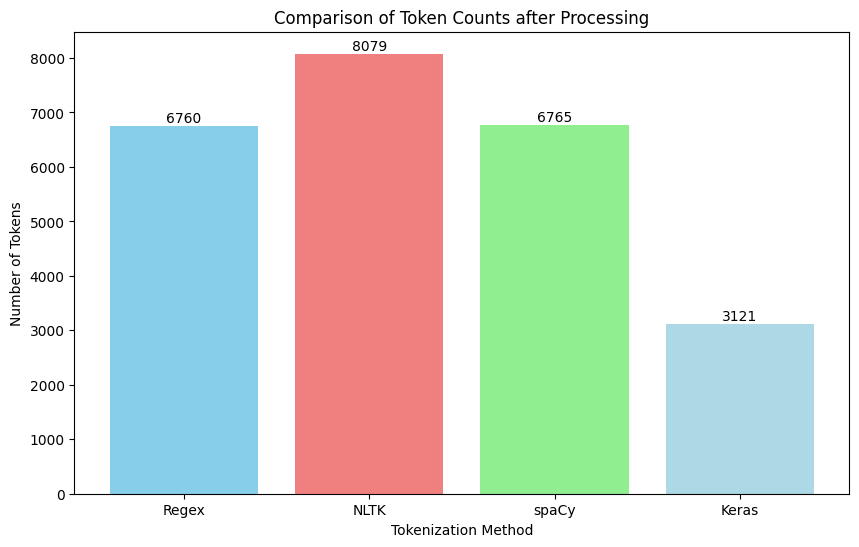

In [147]:
print("\nToken counts after processing:")
print(f"  - Regular Expressions: {len(filtered_tokens)}")
print(f"  - NLTK: {len(filtered_nltk_tokens)}")
print(f"  - spaCy: {len(tokens_spacy)}")
print(f"  - Keras: {len(words_list)}")

categories = ['Regex', 'NLTK', 'spaCy', 'Keras']
values = [len(filtered_tokens), len(filtered_nltk_tokens), len(tokens_spacy), len(words_list)]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel("Tokenization Method")
plt.ylabel("Number of Tokens")
plt.title("Comparison of Token Counts after Processing")

for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

* Regex (6760 tokens) and spaCy (6765 tokens) produce very similar results, which indicates both are performing accurate tokenization and filtering.
* NLTK (8079 tokens) is generating significantly more tokens compared to others. This suggests that:
* NLTK might be splitting tokens more aggressively.

* Keras (3121 tokens) shows the smallest number of tokens, which could be due to:
Successful stopword removal.
Removing numbers and non-alphabetic tokens.